<a href="https://colab.research.google.com/github/ashiqdrive/MyNotebooks/blob/master/HackerEarth_PlagueChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Boiler plate code to import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
# Method to set size for figure
def set_fig_size(w=15,l=10):
  plt.figure(figsize=(w,l))

In [0]:
train_path = "/content/drive/My Drive/HackerEarthPlagueData/train.csv"
test_path = "/content/drive/My Drive/HackerEarthPlagueData/test.csv"

In [0]:
train_full = pd.read_csv(train_path)
train_original = pd.read_csv(train_path)

In [0]:
test_full = pd.read_csv(test_path)
test_original = pd.read_csv(test_path)

In [0]:
train_full.head(10)

,ID,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,WindChill,HeatIndex,THWIndex,Bar,Rain,RainRate,HeatDD,CoolDD,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,WindSamp,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG
0,PR00001,07-12-2040 0:15,53.5,53.6,53.5,85,49.1,2,SSE,0.50,9,SE,53.5,53.4,53.4,29.951,0.0,0.0,0.120,0.0,70.2,50,50.7,68.6,9.25,0.0740,350,1,100.0,15,1,1,1,1,1,1,1
1,PR00002,07-12-2040 0:30,53.5,53.5,53.4,85,49.1,2,SSE,0.50,7,SSE,53.5,53.4,53.4,29.955,0.0,0.0,0.120,0.0,69.3,27,33.9,65.4,5.85,0.0746,352,1,100.0,15,1,1,1,1,1,1,1
2,PR00003,07-12-2040 0:45,53.3,53.5,53.2,85,48.9,2,SSE,0.50,7,SSE,53.3,53.2,53.2,29.954,0.0,0.0,0.122,0.0,68.4,53,50.6,67.3,9.88,0.0743,351,1,100.0,15,1,1,1,1,1,1,1
3,PR00004,07-12-2040 1:00,53.1,53.3,53.0,86,49.0,2,S,0.50,5,S,53.1,53.0,53.0,29.956,0.0,0.0,0.124,0.0,69.8,50,50.3,68.2,9.25,0.0741,351,1,100.0,15,1,1,1,1,1,1,1
4,PR00005,07-12-2040 1:15,52.9,53.1,52.9,86,48.8,2,S,0.50,6,SW,52.9,52.9,52.9,29.959,0.0,0.0,0.126,0.0,71.0,48,50.3,69.4,8.87,0.0740,351,1,100.0,15,1,1,1,1,1,1,1
5,PR00006,07-12-2040 1:30,52.8,53.0,52.7,87,49.0,2,S,0.50,6,SSE,52.8,52.8,52.8,29.957,0.0,0.0,0.127,0.0,67.6,59,52.8,67.1,10.95,0.0743,351,1,100.0,15,1,1,1,1,1,1,1
6,PR00007,07-12-2040 1:45,52.6,52.8,52.6,87,48.8,1,SSE,0.25,5,SSE,52.6,52.6,52.6,29.955,0.0,0.0,0.129,0.0,68.3,52,50.0,67.2,9.68,0.0743,352,1,100.0,15,1,1,1,1,1,1,1
7,PR00008,07-12-2040 2:00,52.5,52.6,52.5,87,48.7,2,S,0.50,5,S,52.5,52.5,52.5,29.960,0.0,0.0,0.130,0.0,69.8,50,50.3,68.2,9.25,0.0741,351,1,100.0,15,1,1,1,1,1,1,1
8,PR00009,07-12-2040 2:15,52.3,52.5,52.2,88,48.9,2,S,0.50,4,SSE,52.3,52.4,52.4,29.959,0.0,0.0,0.132,0.0,70.8,48,50.1,69.1,8.87,0.0740,351,1,100.0,15,1,1,1,1,1,1,1
9,PR00010,07-12-2040 2:30,52.1,52.3,52.1,88,48.7,1,SW,0.25,3,SSW,52.1,52.2,52.2,29.953,0.0,0.0,0.134,0.0,68.6,57,52.8,67.9,10.58,0.0742,351,1,100.0,15,1,1,1,1,1,1,1


In [0]:
target_column_names = list(train_original.iloc[:,-7:].columns)
target_column_names

['PA', 'PB', 'PC', 'PD', 'PE', 'PF', 'PG']

In [0]:
#Description of Target Variables

train_full.iloc[:,-7:].describe()

,PA,PB,PC,PD,PE,PF,PG
count,40000.000000,40000.000000,40000.000000,40000.0000,40000.000000,40000.000000,40000.000000
mean,372.452375,197.904025,117.700025,76.2855,52.868375,38.638975,29.472725
std,645.413994,321.658543,180.131998,110.3007,72.429328,50.285082,36.520023
min,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000
25%,7.000000,6.000000,5.000000,5.0000,4.000000,4.000000,3.000000
50%,55.000000,38.000000,28.000000,22.0000,17.000000,14.000000,12.000000
75%,403.000000,234.000000,148.000000,101.0000,73.000000,55.000000,43.000000
max,2980.000000,1440.000000,786.000000,470.0000,303.000000,207.000000,148.000000


In [0]:
train_full.loc[train_full['PA'] == 2980]

,ID,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,WindChill,HeatIndex,THWIndex,Bar,Rain,RainRate,HeatDD,CoolDD,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,WindSamp,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG
39998,PR39999,08-04-2041 11:00,81.2,82.0,80.6,38,53.2,3,SSE,0.75,7,S,81.2,80.1,80.1,29.966,0.0,0.0,0.0,0.169,68.6,29,35.1,64.9,6.08,0.0747,351,1,100.0,15,2980,1440,786,470,303,207,148
39999,PR40000,08-04-2041 11:15,82.9,83.0,80.9,37,54.0,3,SSE,0.75,8,SE,82.9,82.0,82.0,29.970,0.0,0.0,0.0,0.186,69.3,57,53.4,68.4,10.56,0.0741,352,1,100.0,15,2980,1440,786,470,303,207,148


#Checking NULL values in the data frame

In [0]:
train_full.isnull().sum(axis = 0)

ID              0
DateTime        0
TempOut         0
HiTemp          0
LowTemp         0
OutHum          0
DewPt           0
WindSpeed       0
WindDir         0
WindRun         0
HiSpeed         0
HiDir           0
WindChill       0
HeatIndex       0
THWIndex        0
Bar             0
Rain            0
RainRate        0
HeatDD          0
CoolDD          0
InTemp          0
InHum           0
InDew           0
InHeat          0
InEMC           0
InAirDensity    0
WindSamp        0
WindTx          0
ISSRecpt        0
ArcInt          0
PA              0
PB              0
PC              0
PD              0
PE              0
PF              0
PG              0
dtype: int64

<p> No Null values Awesome !</p>

In [0]:
train_full.describe()

,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindRun,HiSpeed,WindChill,HeatIndex,THWIndex,Bar,Rain,RainRate,HeatDD,CoolDD,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,WindSamp,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0,40000.000000,40000.0,40000.000000,40000.000000,40000.000000,40000.0000,40000.000000,40000.000000,40000.000000
mean,58.508625,58.975230,58.056785,72.915750,48.156873,2.348650,0.587163,6.028675,58.373335,58.139203,58.003950,30.071947,0.000505,0.003950,0.094455,0.026837,69.171345,47.259250,47.181495,67.406550,9.043872,0.074569,351.205575,1.0,99.997938,15.0,372.452375,197.904025,117.700025,76.2855,52.868375,38.638975,29.472725
std,12.119640,12.323427,11.916335,20.873482,7.895771,2.346365,0.586591,4.808251,12.167000,11.858623,11.912303,0.145422,0.004234,0.058002,0.084451,0.061124,2.036967,13.889228,8.363692,2.685041,2.415366,0.000644,0.697801,0.0,0.106524,0.0,645.413994,321.658543,180.131998,110.3007,72.429328,50.285082,36.520023
min,29.300000,29.500000,29.300000,4.000000,1.200000,0.000000,0.000000,0.000000,29.000000,29.100000,28.800000,29.619000,0.000000,0.000000,0.000000,0.000000,58.900000,16.000000,21.100000,55.900000,3.940000,0.072900,323.000000,1.0,94.400000,15.0,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000
25%,51.100000,51.300000,50.800000,58.000000,43.600000,0.000000,0.000000,2.000000,50.800000,51.000000,50.800000,29.961000,0.000000,0.000000,0.000000,0.000000,68.300000,36.000000,40.600000,66.100000,7.220000,0.074100,351.000000,1.0,100.000000,15.0,7.000000,6.000000,5.000000,5.0000,4.000000,4.000000,3.000000
50%,56.400000,56.800000,56.100000,79.000000,49.700000,2.000000,0.500000,5.000000,56.300000,56.100000,55.900000,30.055000,0.000000,0.000000,0.090000,0.000000,69.200000,46.000000,48.300000,67.700000,8.640000,0.074500,351.000000,1.0,100.000000,15.0,55.000000,38.000000,28.000000,22.0000,17.000000,14.000000,12.000000
75%,65.300000,66.000000,64.700000,91.000000,53.900000,4.000000,1.000000,9.000000,65.200000,64.600000,64.500000,30.168000,0.000000,0.000000,0.145000,0.003000,70.100000,58.000000,53.800000,68.800000,10.750000,0.074900,351.000000,1.0,100.000000,15.0,403.000000,234.000000,148.000000,101.0000,73.000000,55.000000,43.000000
max,110.300000,111.000000,108.600000,98.000000,66.900000,16.000000,4.000000,33.000000,110.300000,107.100000,107.100000,30.534000,0.190000,5.940000,0.372000,0.472000,82.000000,88.000000,66.600000,81.100000,19.360000,0.077400,353.000000,1.0,100.000000,15.0,2980.000000,1440.000000,786.000000,470.0000,303.000000,207.000000,148.000000


In [0]:
train_full.describe(include =['object'])

,ID,DateTime,WindDir,HiDir
count,40000,40000,40000,40000
unique,40000,40000,17,17
top,PR23596,09-11-2040 15:30,SSE,SSE
freq,1,1,9870,8470


#Set ID column as id for the data frame

In [0]:
train_full.set_index('ID', inplace=True)

##Data Types of columns

In [0]:
train_full.columns.to_series().groupby(train_full.dtypes).groups

{dtype('int64'): Index(['OutHum', 'WindSpeed', 'HiSpeed', 'InHum', 'WindSamp', 'WindTx',
        'ArcInt', 'PA', 'PB', 'PC', 'PD', 'PE', 'PF', 'PG'],
       dtype='object'),
 dtype('float64'): Index(['TempOut', 'HiTemp', 'LowTemp', 'DewPt', 'WindRun', 'WindChill',
        'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
        'InTemp', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'ISSRecpt'],
       dtype='object'),
 dtype('O'): Index(['DateTime', 'WindDir', 'HiDir'], dtype='object')}

<function matplotlib.pyplot.show>

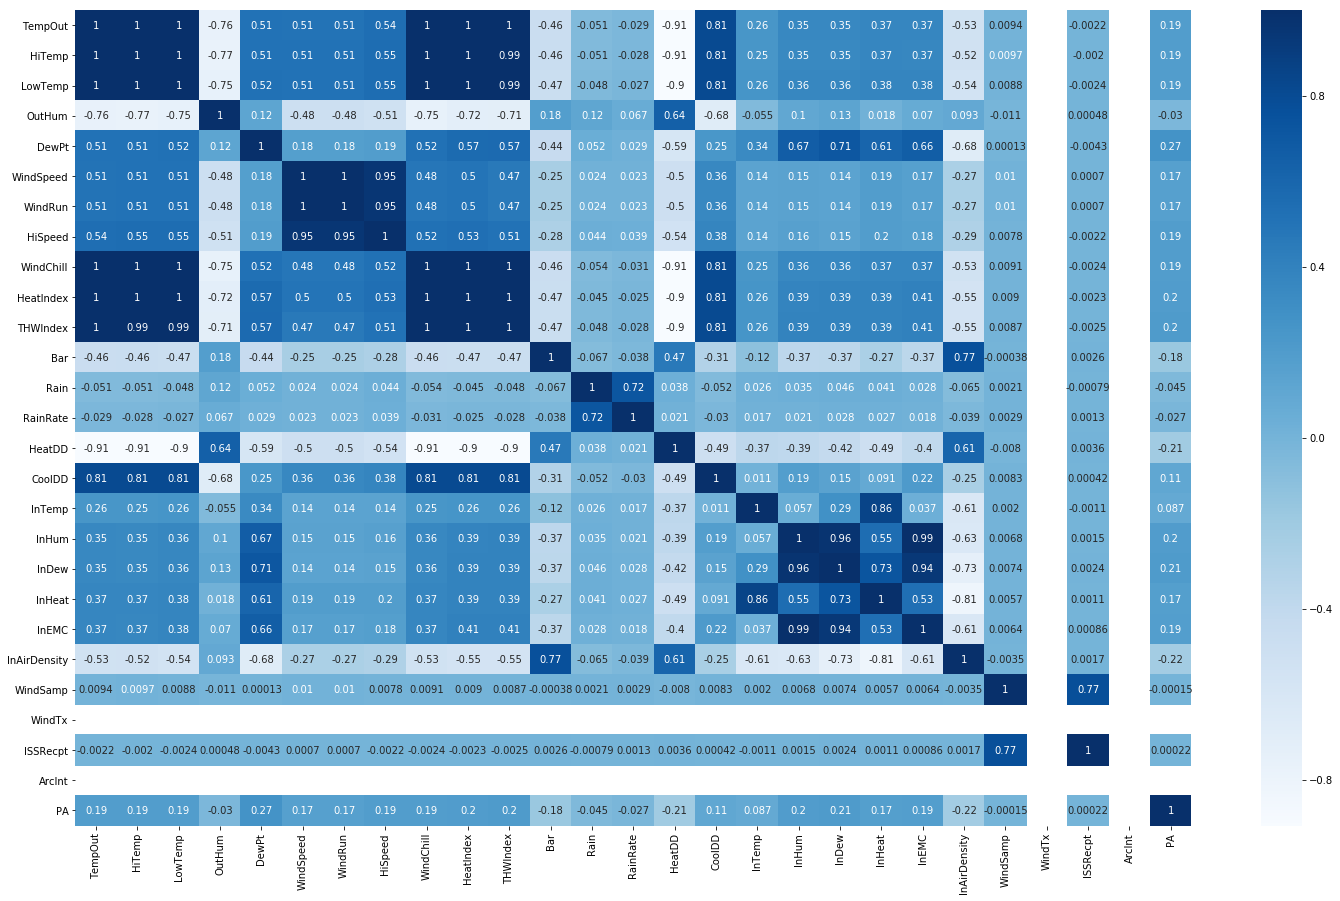

In [0]:
plt.figure(figsize=(25,15))
sns.heatmap(data=train_full.iloc[:,:30].corr(),
            annot=True,
            cmap="Blues")
plt.show

**Keep in mind**: Need to remove some highly corelated features

##Changing Datetime Column to Date Time type

In [0]:
train_full['DateTime'] = pd.to_datetime(train_full['DateTime'])

In [0]:
train_full.dtypes

DateTime        datetime64[ns]
TempOut                float64
HiTemp                 float64
LowTemp                float64
OutHum                   int64
DewPt                  float64
WindSpeed                int64
WindDir                 object
WindRun                float64
HiSpeed                  int64
HiDir                   object
WindChill              float64
HeatIndex              float64
THWIndex               float64
Bar                    float64
Rain                   float64
RainRate               float64
HeatDD                 float64
CoolDD                 float64
InTemp                 float64
InHum                    int64
InDew                  float64
InHeat                 float64
InEMC                  float64
InAirDensity           float64
WindSamp                 int64
WindTx                   int64
ISSRecpt               float64
ArcInt                   int64
PA                       int64
PB                       int64
PC                       int64
PD      

In [0]:
train_full.columns.to_series().groupby(train_full.dtypes).groups

{dtype('<M8[ns]'): Index(['DateTime'], dtype='object'),
 dtype('int64'): Index(['OutHum', 'WindSpeed', 'HiSpeed', 'InHum', 'WindSamp', 'WindTx',
        'ArcInt', 'PA', 'PB', 'PC', 'PD', 'PE', 'PF', 'PG'],
       dtype='object'),
 dtype('float64'): Index(['TempOut', 'HiTemp', 'LowTemp', 'DewPt', 'WindRun', 'WindChill',
        'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
        'InTemp', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'ISSRecpt'],
       dtype='object'),
 dtype('O'): Index(['WindDir', 'HiDir'], dtype='object')}

In [0]:
#set_fig_size()
#sns.distplot(a= train_full['TempOut'],label='TempOut', kde=False)
#sns.distplot(a= train_full['DewPt'], label='DewPt', kde=False)
#
#plt.legend()

#Date Trend Analysis

We are going to use only the date column and the columns we are going to predict to analyse the trends

In [0]:
train_full.columns

Index(['DateTime', 'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt',
       'WindSpeed', 'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill',
       'HeatIndex', 'THWIndex', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
       'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity',
       'WindSamp', 'WindTx', 'ISSRecpt', 'ArcInt', 'PA', 'PB', 'PC', 'PD',
       'PE', 'PF', 'PG'],
      dtype='object')

In [0]:
df_date_analysis = train_full[['DateTime','PA','PB','PC','PD','PE','PF','PG']]

In [0]:
df_date_analysis.head(5)

,DateTime,PA,PB,PC,PD,PE,PF,PG
ID,,,,,,,,
PR00001,2040-07-12 00:15:00,1,1,1,1,1,1,1
PR00002,2040-07-12 00:30:00,1,1,1,1,1,1,1
PR00003,2040-07-12 00:45:00,1,1,1,1,1,1,1
PR00004,2040-07-12 01:00:00,1,1,1,1,1,1,1
PR00005,2040-07-12 01:15:00,1,1,1,1,1,1,1


In [0]:
df_date_analysis.set_index('DateTime', inplace=True)

In [0]:
df_daily_date_analysis = df_date_analysis.resample('D').apply(np.sum)

In [0]:
df_daily_date_analysis.isnull().sum(axis = 0)

PA    0
PB    0
PC    0
PD    0
PE    0
PF    0
PG    0
dtype: int64

In [0]:
print("daily shape", df_daily_date_analysis.shape)
print("Train Shape", train_full.shape)

daily shape (651, 7)
Train Shape (40000, 36)


In [0]:
df_daily_date_analysis.head(50)

,PA,PB,PC,PD,PE,PF,PG
DateTime,,,,,,,
2040-07-01,15908,9988,6777,4875,3705,2868,2341
2040-07-02,16383,10268,6957,4993,3756,2976,2400
2040-07-03,16702,10448,7067,5088,3840,2976,2400
2040-07-04,17028,10632,7178,5159,3869,3040,2429
2040-07-05,17353,10820,7301,5230,3936,3072,2496
2040-07-06,17694,11011,7421,5304,3987,3093,2496
2040-07-07,18034,11205,7536,5380,4032,3168,2505
2040-07-08,18384,11402,7652,5472,4108,3168,2592
2040-07-09,18742,11603,7784,5554,4137,3250,2592


In [0]:
df_daily_date_analysis.describe()

,PA,PB,PC,PD,PE,PF,PG
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,22884.938556,12160.001536,7231.952381,4687.281106,3248.440860,2374.130568,1810.920123
std,51364.176930,25811.970853,14577.859323,9004.290135,5965.592342,4179.845590,3064.429377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,576.000000,480.000000,478.000000,384.000000,384.000000,288.000000,288.000000
75%,14294.500000,8946.000000,6100.000000,4436.000000,3375.000000,2618.000000,2112.000000
max,275447.000000,133563.000000,73070.000000,43860.000000,28317.000000,19385.000000,13907.000000


#Exploratory Visual Analysis Using Plotly

In [0]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

# Initialize plotly
init_notebook_mode(connected=True)

In [0]:
def plotly_df(df, title=''):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode='lines')
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

In [0]:
#Code to View Plotly in Google COLAB
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
configure_plotly_browser_state()
plotly_df(df_daily_date_analysis, title='daily')

#Monthly Analysis

In [0]:
df_monthly_date_analysis = df_date_analysis.resample('M').apply(np.sum)

In [0]:
df_monthly_date_analysis.head(50)

,PA,PB,PC,PD,PE,PF,PG
DateTime,,,,,,,
2040-07-31,196931,123243,83615,60384,45824,36146,29479
2040-08-31,6156,5640,5438,5235,5032,4830,4627
2040-09-30,10405,9379,8295,7579,7120,6662,6204
2040-10-31,19224,16212,14152,12510,11131,10283,9656
2040-11-30,33905,27033,22393,19103,16765,14811,13286
2040-12-31,65105,49086,38813,31836,26857,23115,20466
2041-01-31,121116,86403,65157,51394,41829,35105,30062
2041-02-28,198014,133810,96547,73218,57846,47146,39331
2041-03-31,418491,266231,182702,132897,101145,79922,64976


In [0]:
df_monthly_date_analysis.shape

(22, 7)

In [0]:
df_monthly_date_analysis.isnull().sum(axis = 0)

PA    0
PB    0
PC    0
PD    0
PE    0
PF    0
PG    0
dtype: int64

##Visualization of Monthly Analysis

In [0]:
set_fig_size(25,50)
configure_plotly_browser_state()
plotly_df(df_monthly_date_analysis, title='Monthly')

<Figure size 1800x3600 with 0 Axes>

#Hypothesis
* We see a clear trend that the chance of catching the flu is higher on certain months and lower on certain months so we are going to make an hypohesis on this.
* We will take the **name of the month** as a Feature

In [0]:
train_full.head(5)

,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,WindChill,HeatIndex,THWIndex,Bar,Rain,RainRate,HeatDD,CoolDD,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,WindSamp,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PR00001,2040-07-12 00:15:00,53.5,53.6,53.5,85,49.1,2,SSE,0.5,9,SE,53.5,53.4,53.4,29.951,0.0,0.0,0.120,0.0,70.2,50,50.7,68.6,9.25,0.0740,350,1,100.0,15,1,1,1,1,1,1,1
PR00002,2040-07-12 00:30:00,53.5,53.5,53.4,85,49.1,2,SSE,0.5,7,SSE,53.5,53.4,53.4,29.955,0.0,0.0,0.120,0.0,69.3,27,33.9,65.4,5.85,0.0746,352,1,100.0,15,1,1,1,1,1,1,1
PR00003,2040-07-12 00:45:00,53.3,53.5,53.2,85,48.9,2,SSE,0.5,7,SSE,53.3,53.2,53.2,29.954,0.0,0.0,0.122,0.0,68.4,53,50.6,67.3,9.88,0.0743,351,1,100.0,15,1,1,1,1,1,1,1
PR00004,2040-07-12 01:00:00,53.1,53.3,53.0,86,49.0,2,S,0.5,5,S,53.1,53.0,53.0,29.956,0.0,0.0,0.124,0.0,69.8,50,50.3,68.2,9.25,0.0741,351,1,100.0,15,1,1,1,1,1,1,1
PR00005,2040-07-12 01:15:00,52.9,53.1,52.9,86,48.8,2,S,0.5,6,SW,52.9,52.9,52.9,29.959,0.0,0.0,0.126,0.0,71.0,48,50.3,69.4,8.87,0.0740,351,1,100.0,15,1,1,1,1,1,1,1


#Creating Two more Features 'Month_Name' and 'year_Name'

In [0]:
train_full['Month_Name'] = train_full['DateTime'].dt.month_name()

In [0]:
train_full['year_Name'] = train_full['DateTime'].dt.year

In [0]:
train_full.tail(5)

,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,WindChill,HeatIndex,THWIndex,Bar,Rain,RainRate,HeatDD,CoolDD,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,WindSamp,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG,Month_Name,year_Name
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PR39996,2042-04-01 00:00:00,55.0,55.1,55.0,88,51.5,1,SSE,0.25,3,SSE,55.0,55.0,55.0,30.129,0.0,0.0,0.104,0.000,74.6,41,49.3,73.8,7.77,0.0739,351,1,100.0,15,2978,1439,785,470,303,207,148,April,2042
PR39997,2042-04-04 12:00:00,60.1,60.5,59.1,72,51.0,3,SSE,0.75,8,SE,60.1,59.6,59.6,30.092,0.0,0.0,0.051,0.000,77.2,41,51.7,76.4,7.75,0.0734,351,1,100.0,15,2979,1439,785,470,303,207,148,April,2042
PR39998,2041-08-04 10:30:00,79.6,79.6,75.6,40,53.1,1,S,0.25,4,S,79.6,78.7,78.7,29.969,0.0,0.0,0.000,0.152,68.6,28,34.2,64.8,5.95,0.0747,351,1,100.0,15,2979,1440,785,470,303,207,148,August,2041
PR39999,2041-08-04 11:00:00,81.2,82.0,80.6,38,53.2,3,SSE,0.75,7,S,81.2,80.1,80.1,29.966,0.0,0.0,0.000,0.169,68.6,29,35.1,64.9,6.08,0.0747,351,1,100.0,15,2980,1440,786,470,303,207,148,August,2041
PR40000,2041-08-04 11:15:00,82.9,83.0,80.9,37,54.0,3,SSE,0.75,8,SE,82.9,82.0,82.0,29.970,0.0,0.0,0.000,0.186,69.3,57,53.4,68.4,10.56,0.0741,352,1,100.0,15,2980,1440,786,470,303,207,148,August,2041


Some Random Analysis with month and Year as Feature

In [0]:
train_full[target_column_names+['year_Name','Month_Name']].groupby(['year_Name','Month_Name']).mean()

PA           PB  ...          PF          PG
year_Name Month_Name                            ...                        
2040      August         2.068548     1.895161  ...    1.622984    1.554772
          December      21.876680    16.493952  ...    7.767137    6.877016
          July          66.195294    41.426218  ...   12.149916    9.908908
          November      11.772569     9.386458  ...    5.142708    4.613194
          October        6.459677     5.447581  ...    3.455309    3.244624
          September      3.612847     3.256597  ...    2.313194    2.154167
2041      April        310.835417   184.230903  ...   45.714236   35.990972
          August      2868.002625  1390.732283  ...  201.863517  144.845144
          February      73.665923    49.780506  ...   17.539435   14.632068
          January       40.697581    29.033266  ...   11.796035   10.101478
          July        2031.075269  1014.995968  ...  159.821237  116.351478
          June        1106.994444   584.573958  ...  106.636111   79.613194
          March        140.811238    89.579744  ...   26.891655   21.862719
          May          589.000000   329.373320  ...   70.005376   53.651210
2042      April        537.673913   287.996894  ...   56.493789   42.938923
          March        523.289720   274.219626  ...   51.904984   39.390966

[16 rows x 7 columns]

In [0]:
train_full[target_column_names+['year_Name','Month_Name']].groupby(['Month_Name']).mean().reset_index()

,Month_Name,PA,PB,PC,PD,PE,PF,PG,year_Name
0,April,367.810452,210.293812,132.456578,89.787051,64.462559,48.421737,37.736089,2041.251170
1,August,327.335419,159.520107,87.971701,53.395293,34.967828,24.349121,17.817396,2040.113494
2,December,21.876680,16.493952,13.042003,10.697581,9.024530,7.767137,6.877016,2040.000000
3,February,73.665923,49.780506,35.917783,27.238839,21.520089,17.539435,14.632068,2041.000000
4,January,40.697581,29.033266,21.894153,17.269489,14.055444,11.796035,10.101478,2041.000000
5,July,1048.800370,528.292892,298.850445,184.827088,122.599899,85.997984,63.139136,2040.500084
6,June,1106.994444,584.573958,343.429514,218.991319,148.932639,106.636111,79.613194,2041.000000
7,March,208.755672,122.379635,79.229386,55.210847,40.676812,31.335086,24.976480,2041.177643
8,May,589.000000,329.373320,202.965054,134.770833,94.876680,70.005376,53.651210,2041.000000
9,November,11.772569,9.386458,7.775347,6.632986,5.821181,5.142708,4.613194,2040.000000


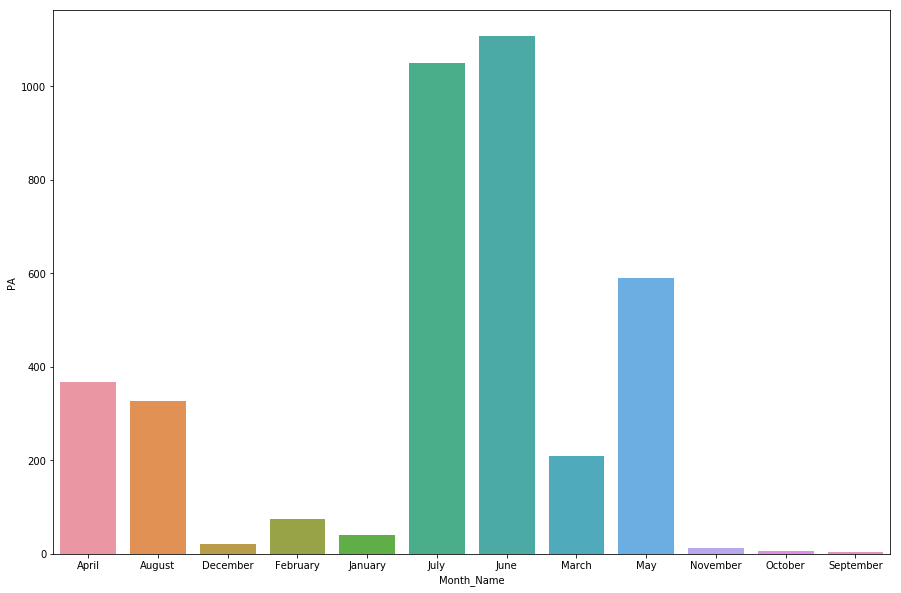

In [0]:
set_fig_size(15,10)
sns.barplot(x='Month_Name',y='PA',data=train_full[target_column_names+['year_Name','Month_Name']].groupby(['Month_Name']).mean().reset_index())

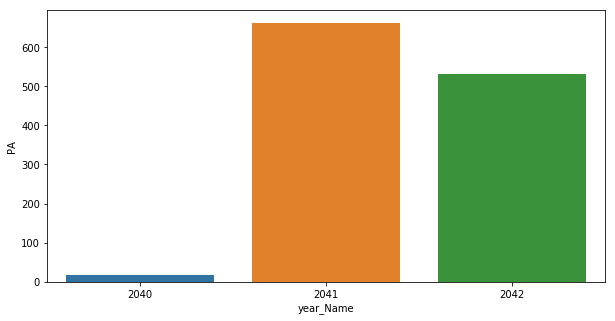

In [0]:
set_fig_size(10,5)
sns.barplot(x='year_Name',y='PA',data=train_full[target_column_names+['year_Name','Month_Name']].groupby(['year_Name']).mean().reset_index())

#Creating a DataFrame which will contain only good Features

In [0]:
df_to_train = train_full.copy()

<function matplotlib.pyplot.show>

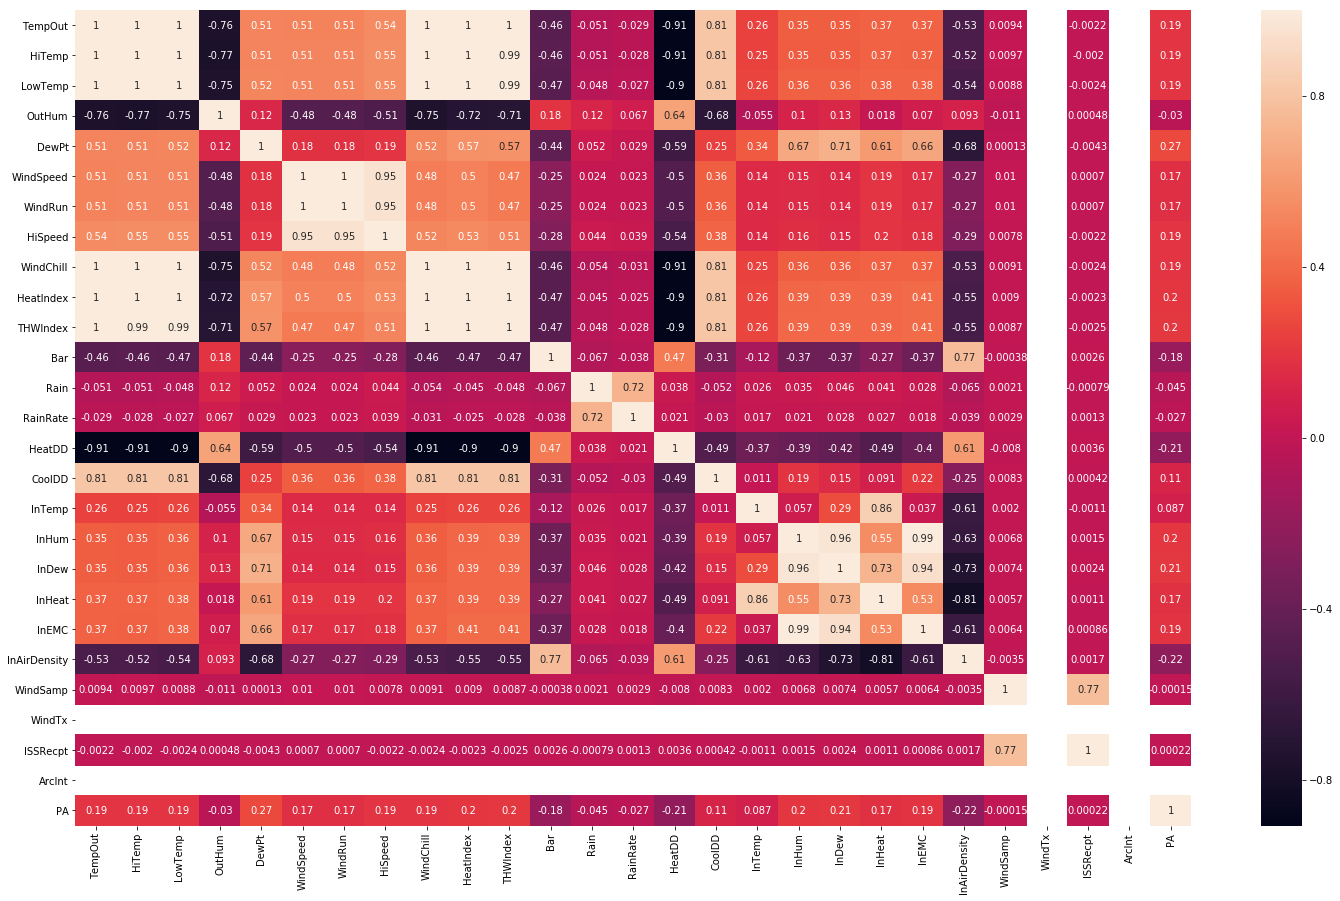

In [0]:
plt.figure(figsize=(25,15))
sns.heatmap(data=df_to_train.iloc[:,:30].corr(),
            annot=True,)
plt.show

##Removing Some Highly corelated column for feature reduction

In [0]:
df_to_train.head(50)

,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,WindChill,HeatIndex,THWIndex,Bar,Rain,RainRate,HeatDD,CoolDD,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,WindSamp,WindTx,ISSRecpt,ArcInt,PA,PB,PC,PD,PE,PF,PG,Month_Name,year_Name
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PR00001,2040-07-12 00:15:00,53.5,53.6,53.5,85,49.1,2,SSE,0.50,9,SE,53.5,53.4,53.4,29.951,0.0,0.0,0.120,0.000,70.2,50,50.7,68.6,9.25,0.0740,350,1,100.0,15,1,1,1,1,1,1,1,July,2040
PR00002,2040-07-12 00:30:00,53.5,53.5,53.4,85,49.1,2,SSE,0.50,7,SSE,53.5,53.4,53.4,29.955,0.0,0.0,0.120,0.000,69.3,27,33.9,65.4,5.85,0.0746,352,1,100.0,15,1,1,1,1,1,1,1,July,2040
PR00003,2040-07-12 00:45:00,53.3,53.5,53.2,85,48.9,2,SSE,0.50,7,SSE,53.3,53.2,53.2,29.954,0.0,0.0,0.122,0.000,68.4,53,50.6,67.3,9.88,0.0743,351,1,100.0,15,1,1,1,1,1,1,1,July,2040
PR00004,2040-07-12 01:00:00,53.1,53.3,53.0,86,49.0,2,S,0.50,5,S,53.1,53.0,53.0,29.956,0.0,0.0,0.124,0.000,69.8,50,50.3,68.2,9.25,0.0741,351,1,100.0,15,1,1,1,1,1,1,1,July,2040
PR00005,2040-07-12 01:15:00,52.9,53.1,52.9,86,48.8,2,S,0.50,6,SW,52.9,52.9,52.9,29.959,0.0,0.0,0.126,0.000,71.0,48,50.3,69.4,8.87,0.0740,351,1,100.0,15,1,1,1,1,1,1,1,July,2040
PR00006,2040-07-12 01:30:00,52.8,53.0,52.7,87,49.0,2,S,0.50,6,SSE,52.8,52.8,52.8,29.957,0.0,0.0,0.127,0.000,67.6,59,52.8,67.1,10.95,0.0743,351,1,100.0,15,1,1,1,1,1,1,1,July,2040
PR00007,2040-07-12 01:45:00,52.6,52.8,52.6,87,48.8,1,SSE,0.25,5,SSE,52.6,52.6,52.6,29.955,0.0,0.0,0.129,0.000,68.3,52,50.0,67.2,9.68,0.0743,352,1,100.0,15,1,1,1,1,1,1,1,July,2040
PR00008,2040-07-12 02:00:00,52.5,52.6,52.5,87,48.7,2,S,0.50,5,S,52.5,52.5,52.5,29.960,0.0,0.0,0.130,0.000,69.8,50,50.3,68.2,9.25,0.0741,351,1,100.0,15,1,1,1,1,1,1,1,July,2040
PR00009,2040-07-12 02:15:00,52.3,52.5,52.2,88,48.9,2,S,0.50,4,SSE,52.3,52.4,52.4,29.959,0.0,0.0,0.132,0.000,70.8,48,50.1,69.1,8.87,0.0740,351,1,100.0,15,1,1,1,1,1,1,1,July,2040


In [0]:
corelated_columns = ['HiTemp','LowTemp','WindRun','WindChill','HeatIndex','THWIndex', 'InDew']
constant_value_columns = ['WindTx', 'ArcInt']

columns_to_drop = corelated_columns +constant_value_columns
columns_to_drop

['HiTemp',
 'LowTemp',
 'WindRun',
 'WindChill',
 'HeatIndex',
 'THWIndex',
 'InDew',
 'WindTx',
 'ArcInt']

In [0]:
df_to_train.drop(columns_to_drop, axis=1, inplace=True)

<function matplotlib.pyplot.show>

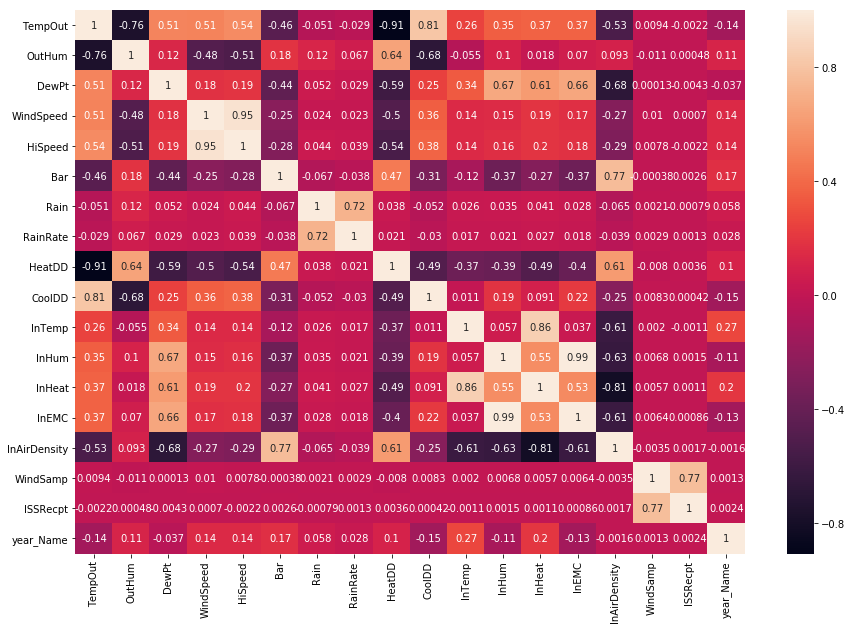

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_to_train.drop(target_column_names, axis = 1).corr(),
            annot=True,)
plt.show

#Analysis on How Much Categorical Features Affect the Target

In [0]:
print(train_full['WindDir'].nunique())
print(train_full['HiDir'].nunique())

17
17


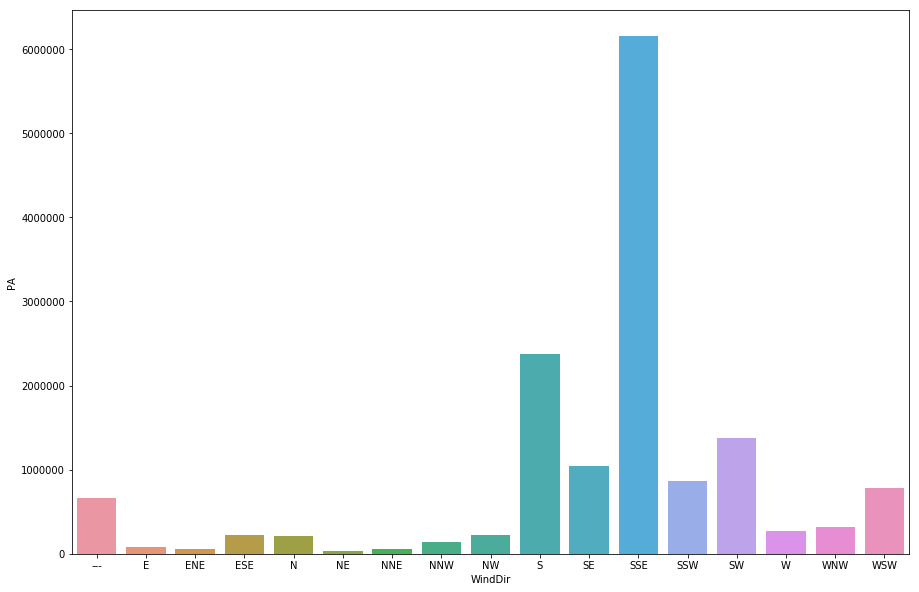

In [0]:
set_fig_size()
sns.barplot(x='WindDir',y="PA",data=train_full[target_column_names+['WindDir']].groupby('WindDir').sum().reset_index())

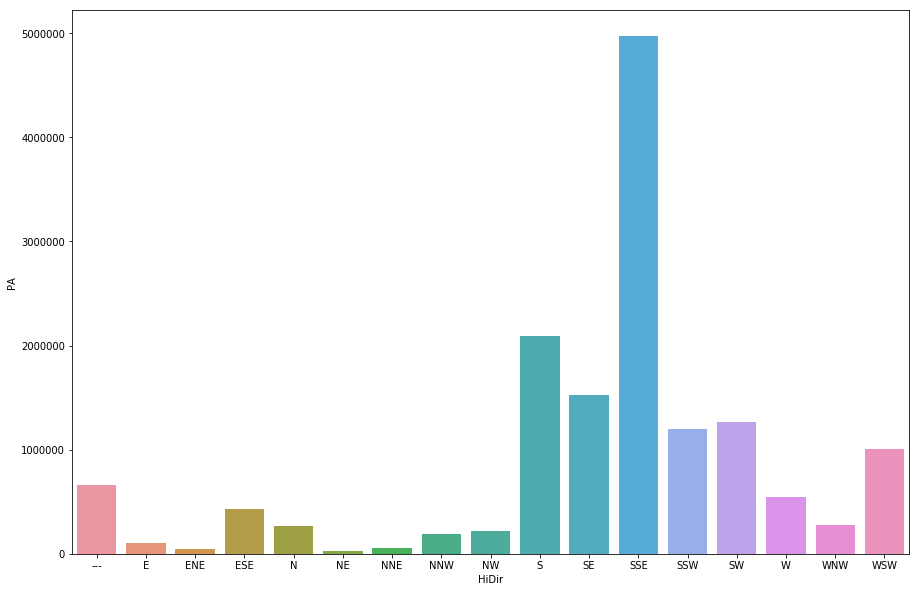

In [0]:
set_fig_size()
sns.barplot(x='HiDir',y="PA",data=train_full[target_column_names+['HiDir']].groupby('HiDir').sum().reset_index())

We see that both the Wind Direction and HiDirection Features have a significant effect on the target but since both have the same effect we will keep any one

In [0]:
#Dropping HiDir Column
df_to_train.drop('HiDir', axis=1, inplace=True)

In [0]:
#Adding HiDir to Columns to Drop List
columns_to_drop.append('HiDir')


In [0]:
columns_to_drop

['HiTemp',
 'LowTemp',
 'WindRun',
 'WindChill',
 'HeatIndex',
 'THWIndex',
 'InDew',
 'WindTx',
 'ArcInt',
 'HiDir']

In [0]:
df_to_train.columns.to_series().groupby(df_to_train.dtypes).groups

{dtype('<M8[ns]'): Index(['DateTime'], dtype='object'),
 dtype('int64'): Index(['OutHum', 'WindSpeed', 'HiSpeed', 'InHum', 'WindSamp', 'PA', 'PB', 'PC',
        'PD', 'PE', 'PF', 'PG', 'year_Name'],
       dtype='object'),
 dtype('float64'): Index(['TempOut', 'DewPt', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
        'InTemp', 'InHeat', 'InEMC', 'InAirDensity', 'ISSRecpt'],
       dtype='object'),
 dtype('O'): Index(['WindDir', 'Month_Name'], dtype='object')}

##Dropping Date

In [0]:
df_to_train.drop('DateTime', axis=1, inplace=True)

In [0]:
#Adding DateTime to Columns to Drop List
columns_to_drop.append('DateTime')

In [0]:
columns_to_drop

['HiTemp',
 'LowTemp',
 'WindRun',
 'WindChill',
 'HeatIndex',
 'THWIndex',
 'InDew',
 'WindTx',
 'ArcInt',
 'HiDir',
 'DateTime']

##Converting 'year_Name'  to Object to OneHotEncode

In [0]:
df_to_train['year_Name'] = df_to_train['year_Name'].astype(object)

In [0]:
df_to_train.columns.to_series().groupby(df_to_train.dtypes).groups

{dtype('int64'): Index(['OutHum', 'WindSpeed', 'HiSpeed', 'InHum', 'WindSamp', 'PA', 'PB', 'PC',
        'PD', 'PE', 'PF', 'PG'],
       dtype='object'),
 dtype('float64'): Index(['TempOut', 'DewPt', 'Bar', 'Rain', 'RainRate', 'HeatDD', 'CoolDD',
        'InTemp', 'InHeat', 'InEMC', 'InAirDensity', 'ISSRecpt'],
       dtype='object'),
 dtype('O'): Index(['WindDir', 'Month_Name', 'year_Name'], dtype='object')}

##Creating X and Y

In [0]:
df_main_X = df_to_train.drop(target_column_names, axis=1)
df_main_Y =df_to_train[target_column_names]

In [0]:
df_main_X.columns

Index(['TempOut', 'OutHum', 'DewPt', 'WindSpeed', 'WindDir', 'HiSpeed', 'Bar',
       'Rain', 'RainRate', 'HeatDD', 'CoolDD', 'InTemp', 'InHum', 'InHeat',
       'InEMC', 'InAirDensity', 'WindSamp', 'ISSRecpt', 'Month_Name',
       'year_Name'],
      dtype='object')

In [0]:
df_main_Y.columns

Index(['PA', 'PB', 'PC', 'PD', 'PE', 'PF', 'PG'], dtype='object')

In [0]:
print(df_main_X.shape)
print(df_main_Y.shape)

(40000, 20)
(40000, 7)


In [0]:
df_main_X_one_hot_using_pandas = pd.get_dummies(df_main_X)

In [0]:
df_main_X_one_hot_using_pandas.shape

(40000, 49)

In [0]:
df_main_X_one_hot_using_pandas.columns

Index(['TempOut', 'OutHum', 'DewPt', 'WindSpeed', 'HiSpeed', 'Bar', 'Rain',
       'RainRate', 'HeatDD', 'CoolDD', 'InTemp', 'InHum', 'InHeat', 'InEMC',
       'InAirDensity', 'WindSamp', 'ISSRecpt', 'WindDir_---', 'WindDir_E',
       'WindDir_ENE', 'WindDir_ESE', 'WindDir_N', 'WindDir_NE', 'WindDir_NNE',
       'WindDir_NNW', 'WindDir_NW', 'WindDir_S', 'WindDir_SE', 'WindDir_SSE',
       'WindDir_SSW', 'WindDir_SW', 'WindDir_W', 'WindDir_WNW', 'WindDir_WSW',
       'Month_Name_April', 'Month_Name_August', 'Month_Name_December',
       'Month_Name_February', 'Month_Name_January', 'Month_Name_July',
       'Month_Name_June', 'Month_Name_March', 'Month_Name_May',
       'Month_Name_November', 'Month_Name_October', 'Month_Name_September',
       'year_Name_2040', 'year_Name_2041', 'year_Name_2042'],
      dtype='object')

##One Hot Encoding using Scikit Learn

In [0]:
# Get list of categorical variables
s = (df_main_X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['WindDir', 'Month_Name', 'year_Name']


In [0]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=True)

In [0]:
df_main_X_one_hot_using_sklearn = cat_encoder.fit_transform(df_main_X[object_cols])
df_main_X_one_hot_using_sklearn 

<40000x32 sparse matrix of type '<class 'numpy.float64'>'
	with 120000 stored elements in Compressed Sparse Row format>

In [0]:
df_main_X_one_hot_using_sklearn.shape

(40000, 32)

In [0]:
type(df_main_X_one_hot_using_sklearn)

scipy.sparse.csr.csr_matrix

#Model Building (only 'PA' as target)

In [0]:
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from math import sqrt

##Shuffle the data

In [0]:
X_main_shuffeled, y_main_shuffeled = shuffle(df_main_X_one_hot_using_pandas.values, df_main_Y['PC'].values)

In [0]:
type(X_main_shuffeled)

numpy.ndarray

##Train Valuation Split

In [0]:
train_X, val_X, train_y, val_y = train_test_split(X_main_shuffeled, y_main_shuffeled, test_size=0.1)

In [0]:
print(train_X.shape,"train_X")
print(val_X.shape,"val_X")
print(train_y.shape,"T Y")
print(val_y.shape,"V Y")

(36000, 49) train_X
(4000, 49) val_X
(36000,) T Y
(4000,) V Y


##XGBoost Model

In [0]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=800, 
                        learning_rate=0.2, 
                        max_depth=25, 
                        random_state=10,
                        objective ='reg:squarederror')

In [0]:
my_model.fit(train_X, train_y, 
             early_stopping_rounds=15, 
             eval_set=[(val_X, val_y)], 
             verbose=1)

In [0]:
predictions = my_model.predict(val_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, val_y)))
print("Root Mean Squared Error : " + str(sqrt(mean_squared_error(predictions, val_y))))

Mean Absolute Error : 7.645387924440205
Root Mean Squared Error : 26.74795368850416


In [0]:
type(val_X)

numpy.ndarray

##Grid Search CV


In [0]:
from sklearn.model_selection import GridSearchCV


Setting Parms for Model and fit_params for GridSearch Fit method

In [0]:
param_grid = [
    {'n_estimators': [500], 'max_depth': [25,35,45]}
]

fit_params={"early_stopping_rounds":15, 
            "eval_metric" : "mae", 
            "eval_set" :[(val_X, val_y)]}

Creating a XGBoost model 

In [0]:
xgb_model = XGBRegressor(learning_rate=0.2,
                         random_state=42,
                         objective ='reg:squarederror')

#grid_search = GridSearchCV(xgb_model, 
#                           param_grid, 
#                           cv=3,                           
#                           scoring='neg_mean_absolute_error',                         
#                           return_train_score=True)
#

In [0]:
grid_search01 = GridSearchCV(xgb_model, 
                             param_grid,
                             verbose=0,
                             cv=2,
                             scoring='neg_mean_absolute_error',
                             return_train_score=True)

In [0]:
grid_search01.fit(X=train_X,y=train_y,**fit_params)

In [0]:
grid_search01.best_params_ 

{'max_depth': 25, 'n_estimators': 500}

In [0]:
predictions_with_grid = grid_search01.predict(val_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions_with_grid, val_y)))
print("Root Mean Squared Error : " + str(sqrt(mean_squared_error(predictions_with_grid, val_y))))

Mean Absolute Error : 29.76518322626874
Root Mean Squared Error : 108.5409272275002


In [0]:
predictions_with_grid = grid_search01.predict(val_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions_with_grid, val_y)))
print("Root Mean Squared Error : " + str(sqrt(mean_squared_error(predictions_with_grid, val_y))))

Mean Absolute Error : 29.76518322626874
Root Mean Squared Error : 108.5409272275002


In [0]:
type(grid_search01)

sklearn.model_selection._search.GridSearchCV

#Saving Model
Saving Model to Predict PA

#Creating Regression Models to Predict all the diseases

In [0]:
def prepare_XGB_model(X,Y):
  """X and Y are dataframes """
  #Shuffle Data
  X_shuff, y_shuff = shuffle(X.values, Y.values)
  
  #Train Val Split the Shuffled dataset
  train_X, val_X, train_y, val_y = train_test_split(X_shuff, y_shuff, test_size=0.1)
  
  #Create a XGBoost Model
  XGBoost_model = XGBRegressor(n_estimators=800, 
                        learning_rate=0.2, 
                        max_depth=35, 
                        random_state=10,
                        objective ='reg:squarederror')
  #Fit the Model
  XGBoost_model.fit(train_X, train_y, 
             early_stopping_rounds=25, 
             eval_set=[(val_X, val_y)], 
             verbose=0)
  
  return XGBoost_model

#Method to Calculate error
def calculate_model_error(model_name, val_set_x, val_set_y):
  predictions = model_name.predict(val_set_x)
  print("Mean Absolute Error : " + str(mean_absolute_error(predictions, val_set_y)))
  print("Root Mean Squared Error : " + str(sqrt(mean_squared_error(predictions, val_set_y))))

In [0]:
PA_model = prepare_XGB_model(df_main_X_one_hot_using_pandas,df_main_Y['PA'])
PB_model = prepare_XGB_model(df_main_X_one_hot_using_pandas,df_main_Y['PB'])
PC_model = prepare_XGB_model(df_main_X_one_hot_using_pandas,df_main_Y['PC'])
PD_model = prepare_XGB_model(df_main_X_one_hot_using_pandas,df_main_Y['PD'])
PE_model = prepare_XGB_model(df_main_X_one_hot_using_pandas,df_main_Y['PE'])
PF_model = prepare_XGB_model(df_main_X_one_hot_using_pandas,df_main_Y['PF'])
PG_model = prepare_XGB_model(df_main_X_one_hot_using_pandas,df_main_Y['PG'])

In [0]:
calculate_model_error(model_name=PG_model,
                      val_set_x = df_main_X_one_hot_using_pandas.values,
                      val_set_y = df_main_Y['PG'])

Mean Absolute Error : 0.35819641379565
Root Mean Squared Error : 1.8737916367615466


#Saving the models

In [0]:
import pickle

PA_model_name = 'PA_saved_model_june_6.pickle.dat';
PB_model_name = 'PB_saved_model_june_6.pickle.dat';
PC_model_name = 'PC_saved_model_june_6.pickle.dat';
PD_model_name = 'PD_saved_model_june_6.pickle.dat';
PE_model_name = 'PE_saved_model_june_6.pickle.dat';
PF_model_name = 'PF_saved_model_june_6.pickle.dat';
PG_model_name = 'PG_saved_model_june_6.pickle.dat';

fullpath_PA = '/content/drive/My Drive/HackerEarthPlagueData/'+PA_model_name
fullpath_PB = '/content/drive/My Drive/HackerEarthPlagueData/'+PB_model_name
fullpath_PC = '/content/drive/My Drive/HackerEarthPlagueData/'+PC_model_name
fullpath_PD = '/content/drive/My Drive/HackerEarthPlagueData/'+PD_model_name
fullpath_PE = '/content/drive/My Drive/HackerEarthPlagueData/'+PE_model_name
fullpath_PF = '/content/drive/My Drive/HackerEarthPlagueData/'+PF_model_name
fullpath_PG = '/content/drive/My Drive/HackerEarthPlagueData/'+PG_model_name

# save model to file
pickle.dump(PA_model, open(fullpath_PA, "wb"))
pickle.dump(PB_model, open(fullpath_PB, "wb"))
pickle.dump(PC_model, open(fullpath_PC, "wb"))
pickle.dump(PD_model, open(fullpath_PD, "wb"))
pickle.dump(PE_model, open(fullpath_PE, "wb"))
pickle.dump(PF_model, open(fullpath_PF, "wb"))
pickle.dump(PG_model, open(fullpath_PG, "wb"))


## some time later...
# 
## load model from file
#loaded_model = pickle.load(open("/content/drive/My Drive/csvs/Test1.pickle.dat", "rb"))
## make predictions for test data
#y_pred = loaded_model.predict(X_test)

# load model from file
#loaded_model = pickle.load(open("/content/drive/My Drive/csvs/final_to_submit.pickle.dat", "rb"))
# make predictions for test data
#y_pred = loaded_model.predict(test_X)

##Loading Models

In [0]:
#load model from file
loaded_model_PA = pickle.load(open(fullpath_PA, "rb"))
loaded_model_PB = pickle.load(open(fullpath_PB, "rb"))
loaded_model_PC = pickle.load(open(fullpath_PC, "rb"))
loaded_model_PD = pickle.load(open(fullpath_PD, "rb"))
loaded_model_PE = pickle.load(open(fullpath_PE, "rb"))
loaded_model_PF = pickle.load(open(fullpath_PF, "rb"))
loaded_model_PG = pickle.load(open(fullpath_PG, "rb"))

In [0]:
# A list which contains all the models
model_list = [PA_model,
              PB_model,
              PC_model,
              PD_model,
              PE_model,
              PF_model,
              PG_model]

In [0]:
# A list which containing all the loaded models from Drive
loaded_model_list = [loaded_model_PA,
                     loaded_model_PB,
                     loaded_model_PC,
                     loaded_model_PD,
                     loaded_model_PE,
                     loaded_model_PF,
                     loaded_model_PG]

#Making Test Set Feature like Train Set

In [0]:
test_full.head(5)

,ID,DateTime,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,WindDir,WindRun,HiSpeed,HiDir,WindChill,HeatIndex,THWIndex,Bar,Rain,RainRate,HeatDD,CoolDD,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,WindSamp,WindTx,ISSRecpt,ArcInt
0,PR40001,08-04-2041 11:30,82.6,83.6,80.8,38,54.4,4,SSE,1.0,9,SSW,82.6,81.8,81.8,29.965,0.0,0.0,0.0,0.183,68.3,29,34.8,64.6,6.08,0.0748,351,1,100.0,15
1,PR40002,08-04-2041 11:45,82.6,83.2,82.1,36,52.9,4,S,1.0,11,SSE,82.6,81.5,81.5,29.967,0.0,0.0,0.0,0.183,69.3,58,53.9,68.5,10.75,0.0741,351,1,100.0,15
2,PR40003,08-04-2041 12:00,83.6,84.5,82.4,38,55.3,4,S,1.0,11,SE,83.6,83.3,83.3,29.964,0.0,0.0,0.0,0.194,68.4,30,35.7,64.8,6.25,0.0747,351,1,100.0,15
3,PR40004,08-04-2041 12:15,85.1,85.5,83.4,37,55.9,4,S,1.0,11,S,85.1,84.7,84.7,29.963,0.0,0.0,0.0,0.209,69.9,56,53.5,68.7,10.35,0.0740,352,1,100.0,15
4,PR40005,08-04-2041 12:30,86.5,87.3,85.1,37,57.1,4,SSE,1.0,10,SSE,86.5,86.2,86.2,29.954,0.0,0.0,0.0,0.224,68.5,67,57.1,68.7,12.38,0.0740,351,1,100.0,15


In [0]:
test_full = test_original.copy()

# Set ID Column as index
test_full.set_index('ID', inplace=True)

# Change DateTime Column to DateTime type
test_full['DateTime'] = pd.to_datetime(test_full['DateTime'])

# Creating Two more Features 'Month_Name' and 'year_Name'
test_full['Month_Name'] = test_full['DateTime'].dt.month_name()
test_full['year_Name'] = test_full['DateTime'].dt.year

# Dropping Columns which are in the list 'columns_to_drop'
test_full.drop(columns_to_drop, axis=1, inplace = True)

# Convert year_name Feature to Object type for One Hot Encoding
test_full['year_Name'] = test_full['year_Name'].astype(object)

# One Hot Encoding Using Pandas
test_full_1hot = pd.get_dummies(test_full)



In [0]:
print("Train Set", df_main_X_one_hot_using_pandas.shape)
print("Test Set", test_full_1hot.shape)


Train Set (40000, 49)
Test Set (22446, 45)


##Feature Diff between Test and Train 

There are some Features in Train Set which are not present in Test set this is because we didn't One Hot Encode using Best Practices which can be found here
[Stack Over flow Answer Test set with fewer features than the train set
](https://stackoverflow.com/questions/44266677/machine-learning-test-set-with-fewer-features-than-the-train-set)
</br>

So we are creating a dummy dataframe with the missing features and set values equals zeros and join them to the test set

In [0]:
feature_difference = set(df_main_X_one_hot_using_pandas) - set(test_full_1hot)
print(feature_difference)

{'Month_Name_May', 'Month_Name_July', 'year_Name_2040', 'Month_Name_June'}


In [0]:
feature_difference_df = pd.DataFrame(data=np.zeros((test_full_1hot.shape[0], len(feature_difference))),
                                     columns=list(feature_difference))

In [0]:
test_full_1hot = test_full_1hot.join(feature_difference_df)

In [0]:
print("Train Set", df_main_X_one_hot_using_pandas.shape)
print("Test Set", test_full_1hot.shape)

Train Set (40000, 49)
Test Set (22446, 49)


In [0]:
feature_difference = set(df_main_X_one_hot_using_pandas) - set(test_full_1hot)
print(feature_difference)

set()


##Reindexing Column of Test set to match the order of columns in Train Set

In [0]:
#Reindexing Column of Test set to match the order of columns in Train Set
test_full_1hot = test_full_1hot.reindex(columns = list(df_main_X_one_hot_using_pandas.columns))


---------------------------------------------------------------------

In [0]:
#list1 = ['Alpha', 'Beta', 'Gamma', 'Sigma']
#list2 = ['one', 'two', 'three', 'four', "five", "six"]
#
#test = zip(list1, list2)  # zip the values
#
#test_dict = dict(zip(list1, list2))
#
#for l1, l2 in zip(list1, list2):
#  print(l1+","+l2)
##print('\nPrinting the values of zip')
##for values in test:
##    print(type(values[1]))  # print each tuples

--------------------------------------------------------------------------

##Checking error rate for all the models using Train Set

In [0]:
for modelName, targetName in zip(model_list,target_column_names):
  print(targetName)
  calculate_model_error(model_name=modelName,
                      val_set_x = df_main_X_one_hot_using_pandas.values,
                      val_set_y = df_main_Y[targetName])

PA
Mean Absolute Error : 2.7233082487247886
Root Mean Squared Error : 30.723117058600785
PB
Mean Absolute Error : 1.9589274011589586
Root Mean Squared Error : 18.491641991352648
PC
Mean Absolute Error : 0.9810523489594459
Root Mean Squared Error : 9.334228416840372
PD
Mean Absolute Error : 0.5175747805446387
Root Mean Squared Error : 5.290840326250569
PE
Mean Absolute Error : 0.34805918018072846
Root Mean Squared Error : 3.7885271554236546
PF
Mean Absolute Error : 0.46673491147756574
Root Mean Squared Error : 2.5337466629088503
PG
Mean Absolute Error : 0.35819641379565
Root Mean Squared Error : 1.8737916367615466


Checking Error rates with loaded models just to check whether all models are saved correctly  with respective name

In [0]:
for modelName, targetName in zip(loaded_model_list,target_column_names):
  print(targetName)
  calculate_model_error(model_name=modelName,
                      val_set_x = df_main_X_one_hot_using_pandas.values,
                      val_set_y = df_main_Y[targetName])

PA
Mean Absolute Error : 2.7233082487247886
Root Mean Squared Error : 30.723117058600785
PB
Mean Absolute Error : 1.9589274011589586
Root Mean Squared Error : 18.491641991352648
PC
Mean Absolute Error : 0.9810523489594459
Root Mean Squared Error : 9.334228416840372
PD
Mean Absolute Error : 0.5175747805446387
Root Mean Squared Error : 5.290840326250569
PE
Mean Absolute Error : 0.34805918018072846
Root Mean Squared Error : 3.7885271554236546
PF
Mean Absolute Error : 0.46673491147756574
Root Mean Squared Error : 2.5337466629088503
PG
Mean Absolute Error : 0.35819641379565
Root Mean Squared Error : 1.8737916367615466


#Predicting for  Test Set with Loaded Model

In [0]:
predictions_PA = loaded_model_PA.predict(test_full_1hot.values)
predictions_PB = loaded_model_PB.predict(test_full_1hot.values)
predictions_PC = loaded_model_PC.predict(test_full_1hot.values)
predictions_PD = loaded_model_PD.predict(test_full_1hot.values)
predictions_PE = loaded_model_PE.predict(test_full_1hot.values)
predictions_PF = loaded_model_PF.predict(test_full_1hot.values)
predictions_PG = loaded_model_PG.predict(test_full_1hot.values)

In [295]:
predictions_PA.astype('int32')

array([2920, 2960, 2895, ...,  103,  272,   90], dtype=int32)

In [0]:
d = {'PA' : predictions_PA.astype('int32'),
     'PB' : predictions_PB.astype('int32'),
     'PC' : predictions_PC.astype('int32'),
     'PD' : predictions_PD.astype('int32'),
     'PE' : predictions_PE.astype('int32'),
     'PF' : predictions_PF.astype('int32'),
     'PG' : predictions_PG.astype('int32')}

final_to_submit = pd.DataFrame(data = d, index=test_full_1hot.index)

In [298]:
final_to_submit.head(5)

,PA,PB,PC,PD,PE,PF,PG
ID,,,,,,,
PR40001,2920,1408,772,461,298,203,145
PR40002,2960,1434,770,467,299,204,146
PR40003,2895,1381,767,461,293,203,145
PR40004,2938,1413,763,462,296,202,146
PR40005,2870,1408,762,454,296,200,144


In [0]:
final_to_submit.to_csv("/content/drive/My Drive/HackerEarthPlagueData/ashiq_submit01.csv")

In [300]:
final_to_submit.isnull().sum(axis = 0)

PA    0
PB    0
PC    0
PD    0
PE    0
PF    0
PG    0
dtype: int64

In [301]:
final_to_submit.shape

(22446, 7)

In [302]:
test_original.shape

(22446, 30)

#Date Time Descrbe

In [0]:
test_full['DateTime'] = pd.to_datetime(test_full['DateTime'])

In [0]:
test_full['DateTime'].describe()

In [0]:
train_full['DateTime'].describe()